In [37]:
# making Some essential imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [38]:
# loading and checking data
dataFrame = pd.read_csv(r'instagram_reach.csv')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    int64 
 7   Likes              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [39]:
dataFrame[0:10]

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7,18


In [57]:
# lets know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = dataFrame[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

In [ ]:
WordCloudPlotter('Caption')

In [ ]:
# lets do something similar with hashtags
WordCloudPlotter('Hashtags')

In [ ]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

In [44]:

# gathering features
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype='float32')
targets = np.array(dataFrame['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [46]:
#diving targets by max values
targets = targets/maxValLikes

In [47]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

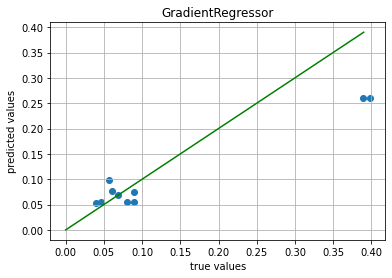

In [49]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [50]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

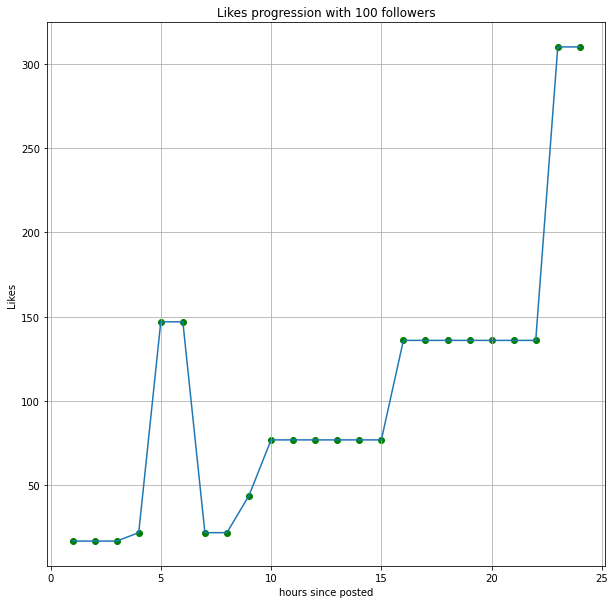

In [51]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

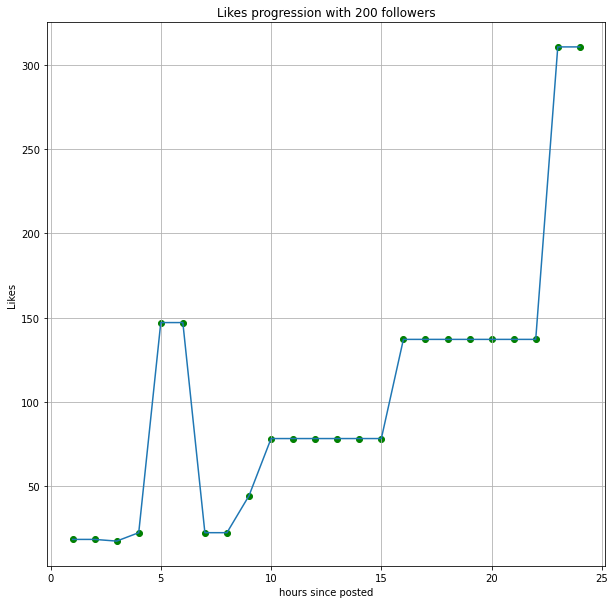

In [52]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

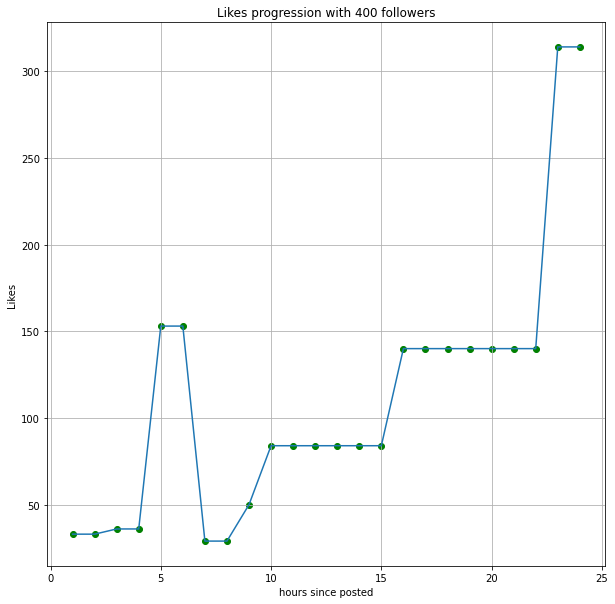

In [53]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

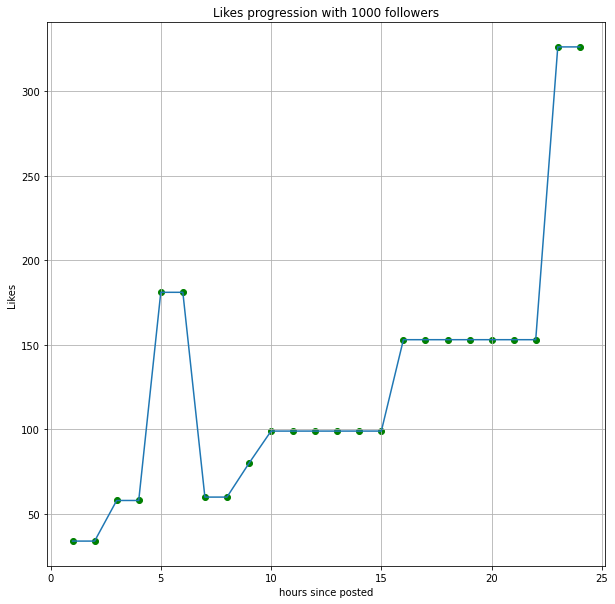

In [54]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

In [55]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

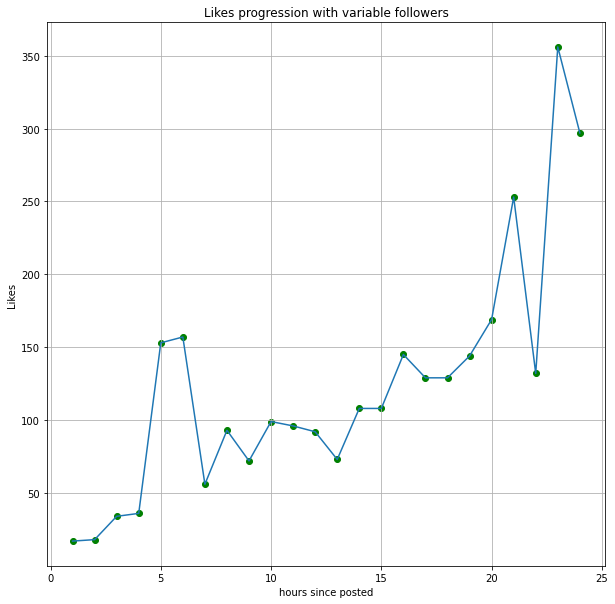

In [56]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)